In [2]:
# modules

In [3]:
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 

In [5]:
start="1949/5/16"
end="2017/1/31"

In [6]:
# FredよりNIKKEI平均を取得
N225 = pdr.DataReader("NIKKEI225", 'fred', start, end)
N225.head(1)

,NIKKEI225
DATE,
1949-05-16,176.21


In [7]:
N225.tail(1)

,NIKKEI225
DATE,
2017-01-31,19041.34


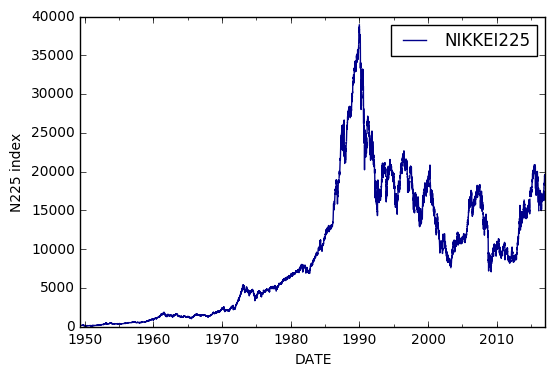

In [8]:
N225.plot(color='darkblue')
plt.ylabel('N225 index')

In [9]:
# YahooよりNIKKEI平均を取得
price = pdr.DataReader("^N225", 'yahoo', "1984/1/4", end)
price.head(1)

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1984-01-04,9927.0,9927.0,9927.0,9927.0,0,9927.0


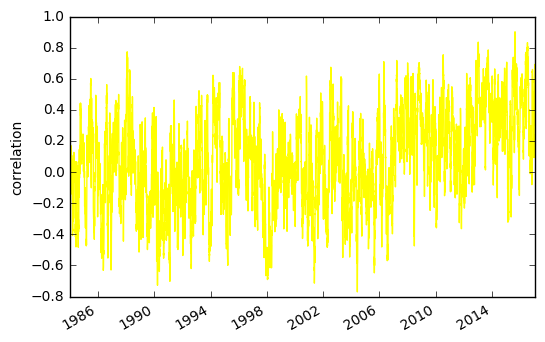

In [10]:
# Fredよりドル円為替レートを取得し、NIKKEI平均との相関をプロット
fx = pdr.DataReader('DEXJPUS','fred',start,end)
port = pd.concat([price.Close, fx], axis=1).dropna()
n = port.Close.pct_change().dropna()
f = port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color="yellow")
plt.ylabel('correlation')

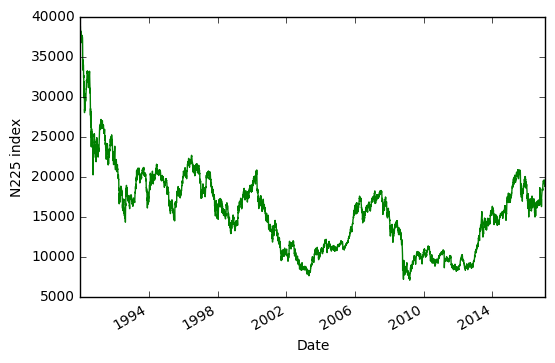

In [24]:
#　バーブル以降のNIKKEI225
price1 = price.ix["1990/1/1":]
price1.Close.plot(color='green')
price2 = price.ix["2015",0:2]
price2.tail(1)
plt.ylabel("N225 index")

In [44]:
# 日経平均を月単位にResampling
print(price.resample('M').first().tail())
# →月初

                    Open          High           Low         Close  Volume  \
Date                                                                         
2016-09-30  16885.160156  16941.179688  16864.560547  16926.839844  127600   
2016-10-31  16566.029297  16652.160156  16554.830078  16598.669922   96200   
2016-11-30  17380.539062  17473.119141  17339.640625  17442.400391  119300   
2016-12-31  18535.240234  18746.279297  18469.269531  18513.119141  182400   
2017-01-31  19298.679688  19594.160156  19277.929688  19594.160156  163500   

               Adj Close  
Date                      
2016-09-30  16926.839844  
2016-10-31  16598.669922  
2016-11-30  17442.400391  
2016-12-31  18513.119141  
2017-01-31  19594.160156  


In [37]:
print(price.resample('M').last().tail())
# →月末

                    Open          High           Low         Close  Volume  \
Date                                                                         
2016-09-30  16474.449219  16497.550781  16407.779297  16449.839844  120700   
2016-10-31  17360.890625  17433.130859  17327.619141  17425.019531  152500   
2016-11-30  18356.029297  18370.310547  18280.660156  18308.480469       0   
2016-12-31  18997.679688  19176.810547  18991.589844  19114.369141  117800   
2017-01-31  19145.349609  19199.750000  19041.339844  19041.339844       0   

               Adj Close  
Date                      
2016-09-30  16449.839844  
2016-10-31  17425.019531  
2016-11-30  18308.480469  
2016-12-31  19114.369141  
2017-01-31  19041.339844  


In [38]:
print(price.resample('M', loffset='1d').last().tail())
# →データはそのままに日付を１日先に設定する

                    Open          High           Low         Close  Volume  \
Date                                                                         
2016-10-01  16474.449219  16497.550781  16407.779297  16449.839844  120700   
2016-11-01  17360.890625  17433.130859  17327.619141  17425.019531  152500   
2016-12-01  18356.029297  18370.310547  18280.660156  18308.480469       0   
2017-01-01  18997.679688  19176.810547  18991.589844  19114.369141  117800   
2017-02-01  19145.349609  19199.750000  19041.339844  19041.339844       0   

               Adj Close  
Date                      
2016-10-01  16449.839844  
2016-11-01  17425.019531  
2016-12-01  18308.480469  
2017-01-01  19114.369141  
2017-02-01  19041.339844  


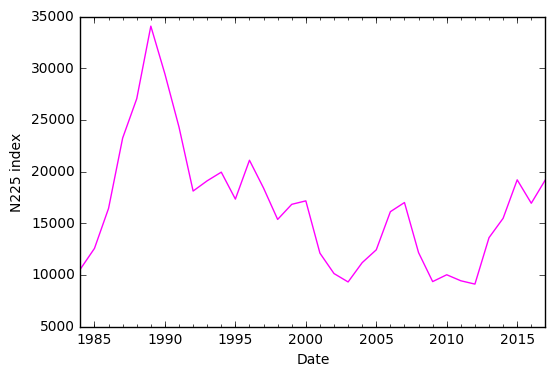

In [54]:
# 年足のデータに変換してチャートを描く
price.resample('A').mean().Close.plot(color='magenta')
plt.ylabel('N225 index')
# first,last指定していないので平均値になる